In [2]:
import os
import jax
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from scipy.stats import norm

from utils.utils import PyTree, uncertainty

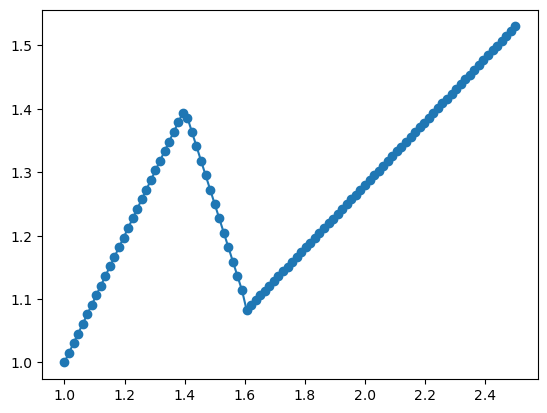

In [58]:
x = jnp.linspace(1, 2.5, 100)
y = x*(x<=1.4) + (3.5+((1.1-1.4)/(1.6-1.4))*x)*(x>1.4)*(x<1.6) + (0.5*x+.28)*(x>=1.6)
plt.plot(x,y, 'o-')

(0.925, 2.575, 0.9711789220571518, 1.5832429200410842)

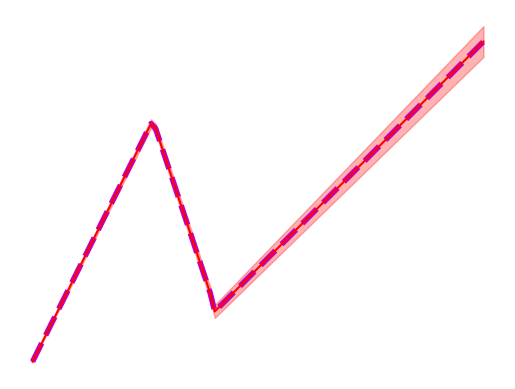

In [26]:
x = jnp.linspace(1, 2.5, 100)
y = x*(x<=1.4) + (3.5+((1.1-1.4)/(1.6-1.4))*x)*(x>1.4)*(x<1.6) + (0.5*x+.28)*(x>=1.6)
y_pred = x*(x<=1.4) + (3.1+((1.1-1.4)/(1.65-1.4))*x)*(x>1.4)*(x<1.6) + (0.6*x+.2)*(x>=1.6)
plt.plot(x,y, '--m', linewidth=4)
plt.plot(x,y, '-r')

y_data = y + 0.03*jax.random.normal(jax.random.PRNGKey(50), y.shape)

point = jnp.concatenate([jnp.arange(10, 27), jnp.arange(40, 70)])
x_data = x[point]
y_data = y_data[point]
# plt.plot(x_data,y_data, '^')
# plt.fill_between(x, y-0.1, y+0.1, color='r', alpha=0.3)

j_epe = 0.1*jnp.linspace(0.01, 0.25, x.shape[0])
j_epe1 = 0#-0.3*jnp.sin(5*jnp.pi*x*(x>1.4)*(x<1.6))

plt.fill_between(x, y-j_epe-(3*j_epe)**3-j_epe1, 
                 y+j_epe+(3*j_epe)**3+j_epe1, color='r', alpha=0.3)
plt.axis('off')

In [12]:
HOME = os.getcwd()
case = ''
# ext_name='_ND_rnd_20x20_1e2t1e2_train'
# ext_name='_ND_rnd_40x40_1e3t1e3_train'

train_var=[0,1]

prob_name = 'RD'  ## option: RD
case_no   =  0



# dir = prob_name+'_C'+str(case_no)+'_D'+str(train_var)+'_ND_GP_200x20_5e4t1e2'
# dir = prob_name+'_C'+str(case_no)+'_D'+str(train_var)+'_test'

# dir = 'RD_C0_D[1]_N_GP_20x20_1e2t1e2'
# dir = 'RD_C0_D[1]_ND_rnd_20x20_1e2t1e2'
# dir = 'RD_C0_D[0, 1]_ND_GP_200x20_5e4t1e2'
# dir = 'RD_C0_D[1]_Diff'
# dir = 'RD_C0_D[0, 1]_ND_rnd_20x20_1e2t1e2'
dir = 'RD_C0_D[1]_ND_GP_200x20_5e4t1e2'
print('case = '+dir)
path = os.path.join(HOME, "output/PDE/"+dir)

epoch = 500
#for plotting training
PostPross_Data = PyTree.load(path+'/checkpoints', name='PostPross_Data'+str(epoch))
#for plotting testing
# PostPross_Data = PyTree.load(path+'/checkpoints', name='PostPross_Data_test_40x_0.001t')
# state = PyTree.load(path+'/checkpoints', name='state'+str(epoch))
# data = PyTree.load(path+'/checkpoints', name='Data_20x_0.01t')
data = PostPross_Data['cdata']

case = RD_C0_D[1]_ND_GP_200x20_5e4t1e2
loading PostPross_Data500 parameters
Found PostPross_Data500 parameters


In [5]:
state = PyTree.load(path+'/checkpoints', name='HMC')

loading HMC parameters
Error: Could not find parameters


In [13]:
Grid = data['Grid']
t_arr = data['t_arr']
data_train = data['data_train']
data_test = data['data_test']
train_idx = data['train_idx']
sort_idx = PostPross_Data['sort_idx']
pred_rX = PostPross_Data['pred_rX']

#for plotting testing
PhyDEStore   = PostPross_Data['PhyDEStore']
PhySWAGStore = PostPross_Data['PhySWAGStore']
TrainLossStore = PostPross_Data['TrainLossStore']

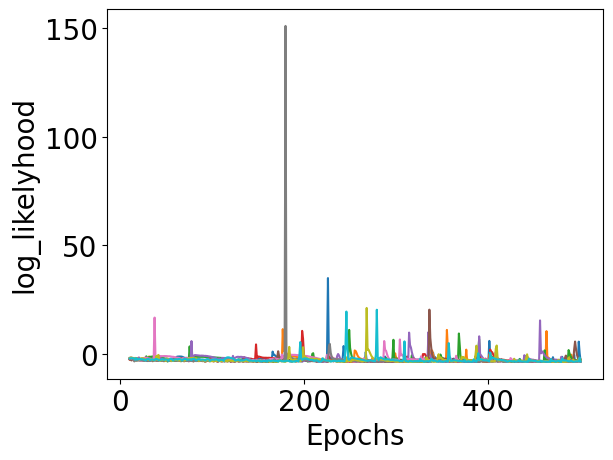

In [54]:
plt.plot(TrainLossStore[0][10:], TrainLossStore[1][10:])
plt.xlabel('Epochs')
plt.ylabel('log_likelyhood')
plt.show()

In [14]:
Epoch = PhyDEStore[0]
for i in [1,2]:
    PhyDEStore[i] = np.abs(PhyDEStore[i][:,sort_idx])
for i in [1,2]:
    for j in [0,1]:
        PhySWAGStore[i][j] = np.abs(PhySWAGStore[i][j][:,sort_idx])
D_DE   = [(np.mean(PhyDEStore[1], axis=1), np.std(PhyDEStore[1], axis=1)),
          (np.mean(PhyDEStore[2], axis=1), np.std(PhyDEStore[2], axis=1))]
D_swag = [(np.mean(PhySWAGStore[1][0], axis=1), np.sqrt(np.mean(PhySWAGStore[1][1]-PhySWAGStore[1][0]**2, axis=1) + np.var(PhySWAGStore[1][0], axis=1))),
          (np.mean(PhySWAGStore[2][0], axis=1), np.sqrt(np.mean(PhySWAGStore[2][1]-PhySWAGStore[2][0]**2, axis=1) + np.var(PhySWAGStore[2][0], axis=1)))]

D_true = [2.8 , 5.0]
std = 3

/tmp/ipykernel_206556/472597928.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


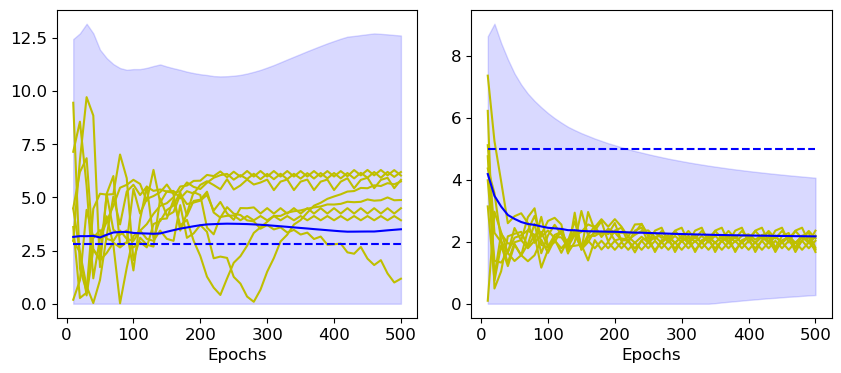

In [15]:
fig, ax = plt.subplots(1,2, figsize=(2*5, 1*4), gridspec_kw = {'wspace':0.15, 'hspace':0})

fontsize = 14
plt.rcParams['font.size'] = fontsize
for i in [0,1]:
    for m in range(PhyDEStore[1].shape[1]):
        ax[i].plot(Epoch, PhyDEStore[i+1][:,m], 'y')
    ax[i].plot(Epoch, D_swag[i][0], 'b')
    ax[i].plot(Epoch, jnp.ones_like(Epoch)*D_true[i], '--b')
    ax[i].fill_between(Epoch, np.clip(D_swag[i][0]-std*D_swag[i][1], 0, 100), (D_swag[i][0]+std*D_swag[i][1]), color='b', alpha=0.15)
    ax[i].set_xlabel('Epochs')
    # ax[i].set_ylabel('D'+str(i+1))
# ax[0].text(450, 7.8, r'$D_1$', horizontalalignment='right', verticalalignment='center',  fontsize=fontsize*2)
# ax[1].text(450, 9.8, r'$D_2$', horizontalalignment='right', verticalalignment='center',  fontsize=fontsize*2)

fig.tight_layout()
# plt.savefig(path+'/plots/Coeff'+case+ext_name, dpi=300)

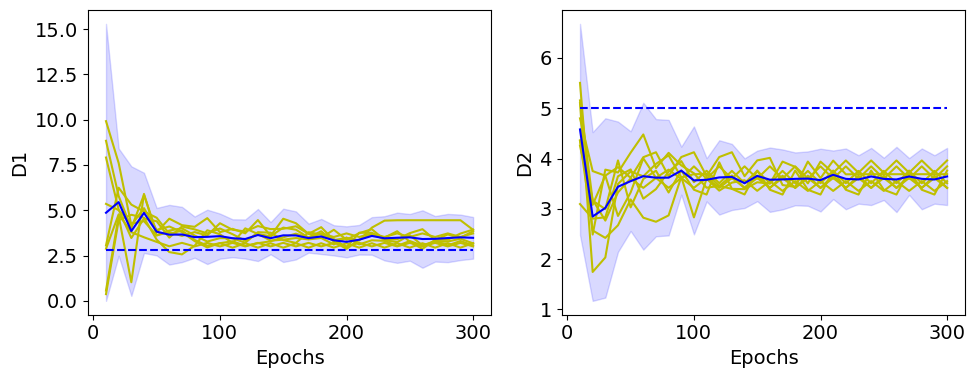

In [53]:
fig, ax = plt.subplots(1,2, figsize=(2*5, 1*4))

for i in [0,1]:
    for m in range(PhyDEStore[1].shape[1]):
        ax[i].plot(Epoch, PhyDEStore[i+1][:,m], 'y')
    ax[i].plot(Epoch, D_DE[i][0], 'b')
    ax[i].plot(Epoch, jnp.ones_like(Epoch)*D_true[i], '--b')
    ax[i].fill_between(Epoch, np.clip(D_DE[i][0]-std*D_DE[i][1], 0, 100), (D_DE[i][0]+std*D_DE[i][1]), color='b', alpha=0.15)
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('D'+str(i+1))
fig.tight_layout()
plt.show()


In [8]:
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter

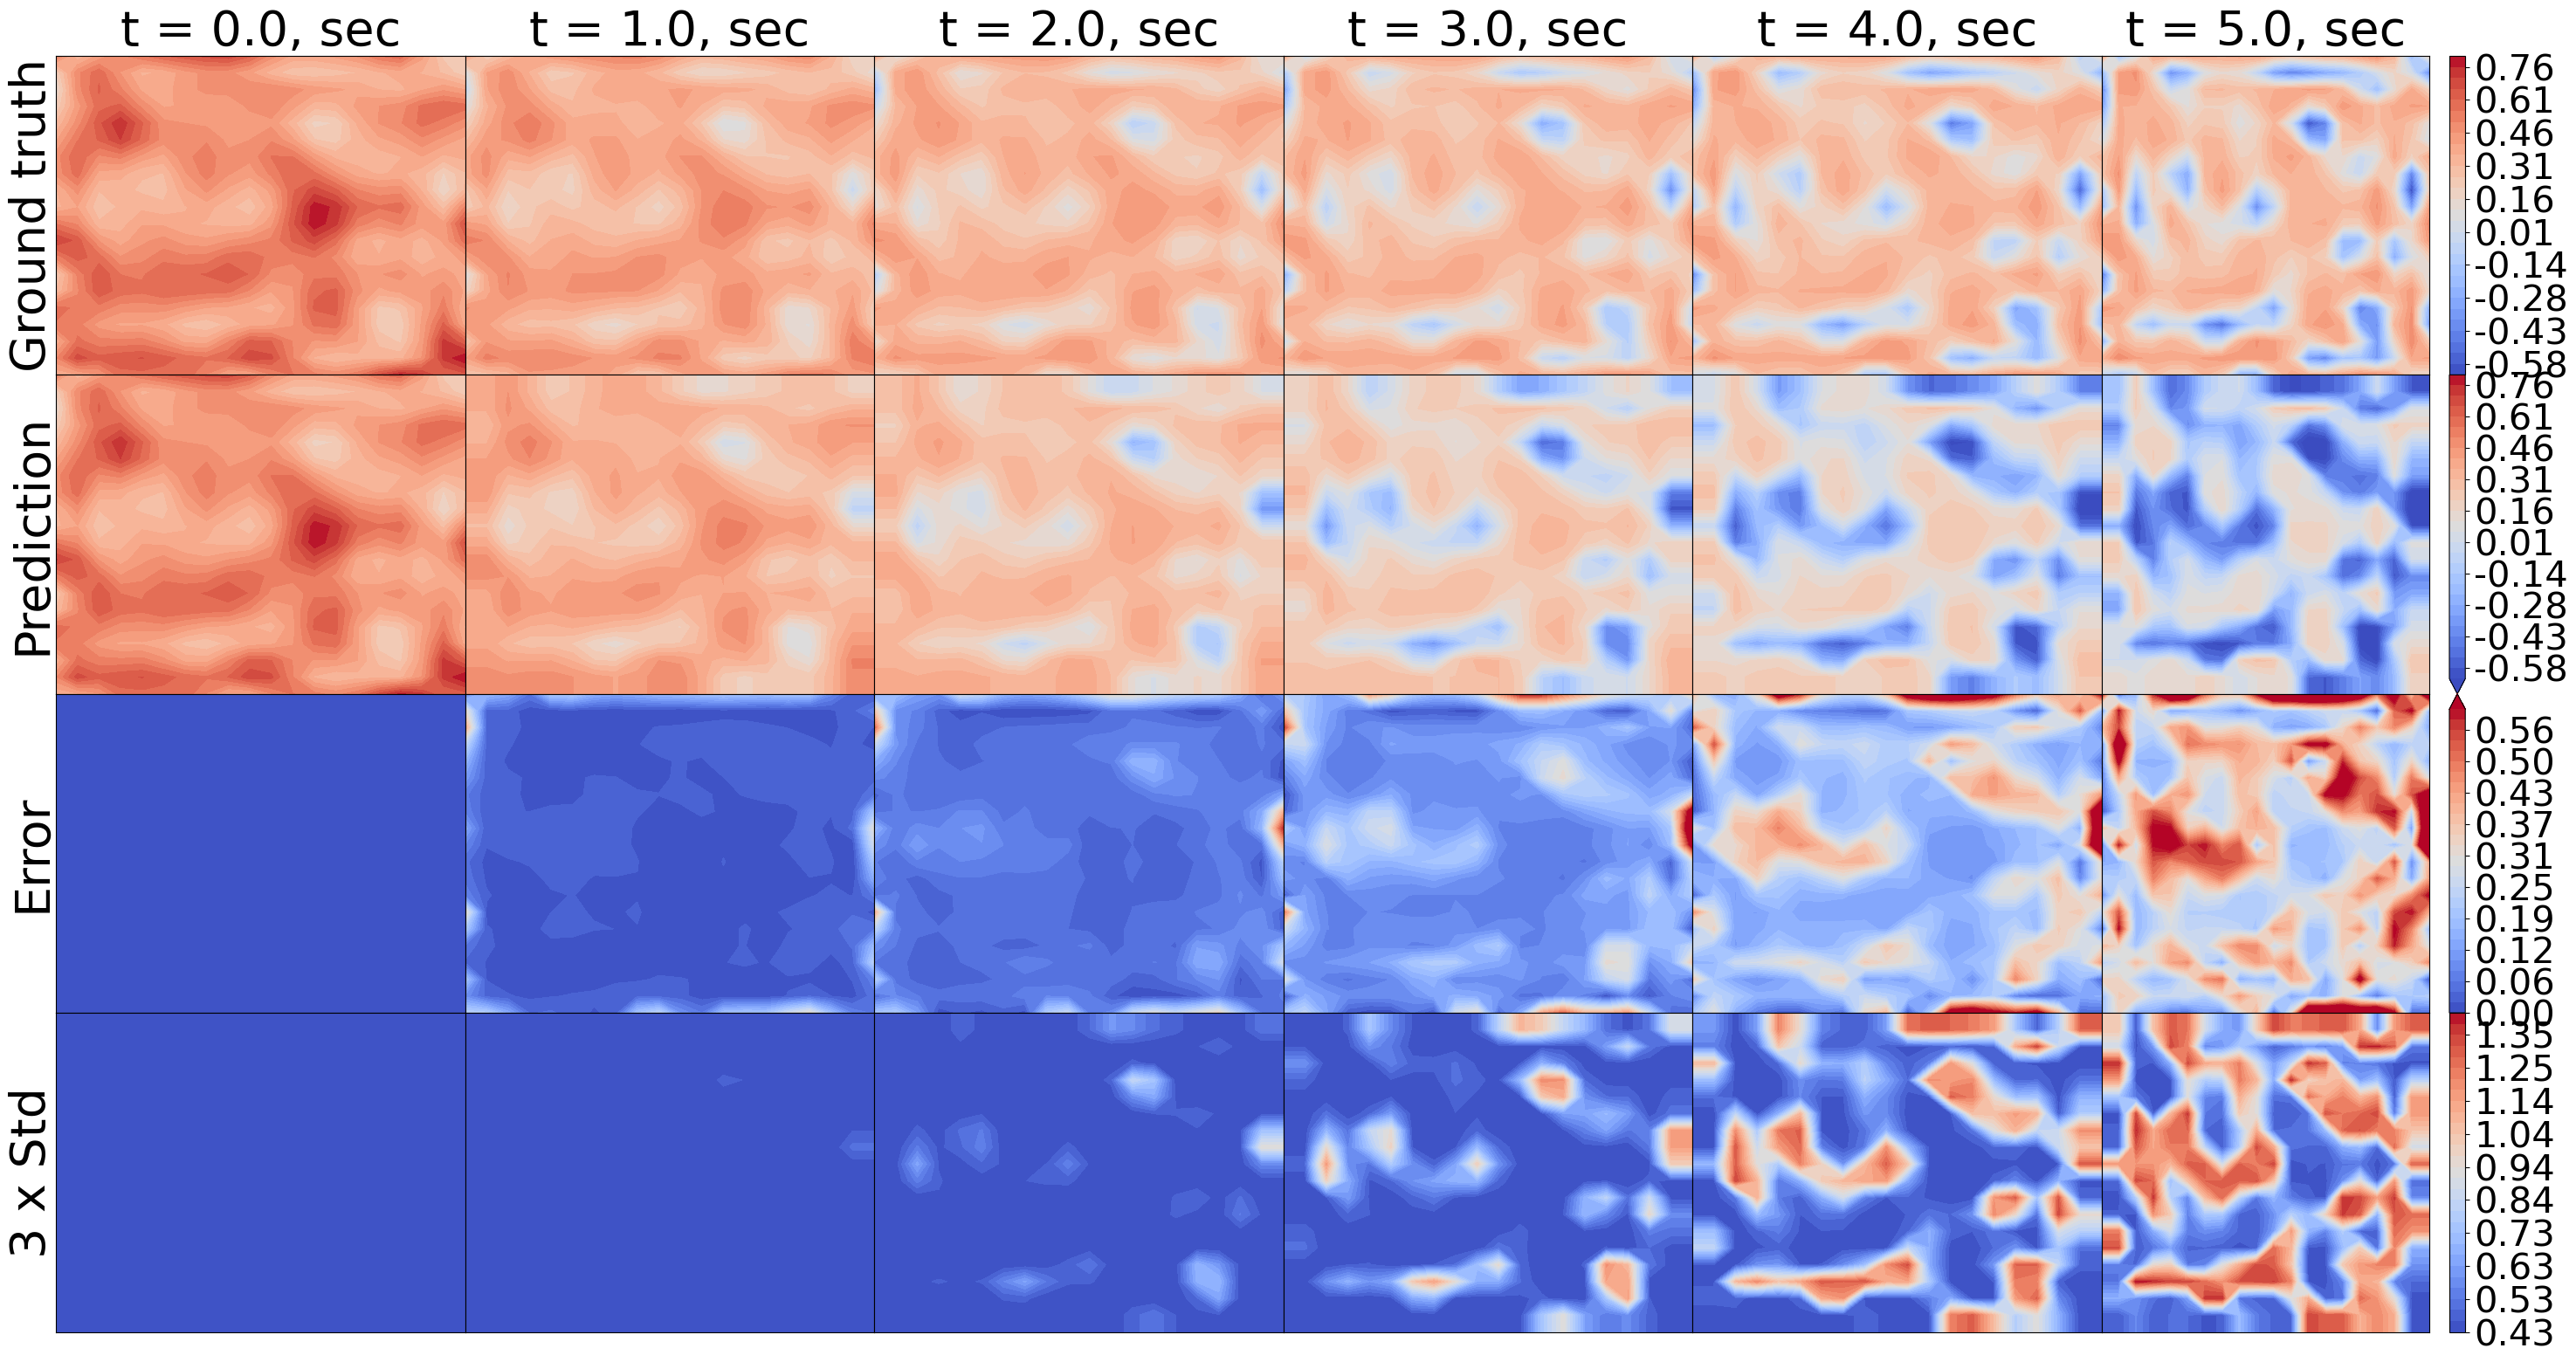

In [ ]:
std_ord = 3
# cmap = 'RdGy'
# cmap = 'RdGy_r'
cmap = 'coolwarm'
# cmap = 'viridis'
sample_times = [int(el) for el in jnp.linspace(0, len(t_arr), 6)]

X_mean, sX_tot, sX_ale, sX_eps = uncertainty(pred_rX)

Udmin, Udmax = jnp.min(data_test[:,0]), jnp.max(data_test[:,0])
Upmin, Upmax = jnp.min(X_mean[:,0]), jnp.max(X_mean[:,0])
Vdmin, Vdmax = jnp.min(data_test[:,1]), jnp.max(data_test[:,1])
Vpmin, Vpmax = jnp.min(X_mean[:,1]), jnp.max(X_mean[:,1])
sUpmin, sUpmax = jnp.min(sX_tot[:,0]), jnp.max(sX_tot[:,0])
sVpmin, sVpmax = jnp.min(sX_tot[:,1]), jnp.max(sX_tot[:,1])
Up, Vp = X_mean[:,0], X_mean[:,1]
Ud, Vd = data_test[:,0], data_test[:,1]
sU, sV = sX_tot[:,0], sX_tot[:,1]
saU, saV = sX_ale[:,0], sX_ale[:,1]
seU, seV = sX_eps[:,0], sX_eps[:,1]
dfUtest  = jnp.abs(Up-Ud)
dfUtrain = jnp.abs(Up[:len(data_train)]-data_train[:,0])
dfVtest  = jnp.abs(Vp-Vd)
dfVtrain = jnp.abs(Vp[:len(data_train)]-data_train[:,1])
dfUmin, dfUmax   = jnp.min(dfUtest), max(jnp.max(dfUtest), jnp.max(dfUtrain))
dfVmin, dfVmax   = jnp.min(dfVtest), max(jnp.max(dfVtest), jnp.max(dfVtrain))

plt.close('all')
fontsize = 20
plt.rcParams['font.size'] = fontsize
fig, ax = plt.subplots(4, len(sample_times), figsize=(len(sample_times)*5, 4*4), gridspec_kw = {'wspace':0, 'hspace':0})
for i,tidx in enumerate(sample_times):
    ax[0,i].set_title('t = '+str('{:2.1f}'.format(t_arr[tidx]))+', sec', size=fontsize*2)
    # for c in pcm0.collections: c.set_rasterized(True)
    pcm0 = ax[0,i].contourf(Grid['grid_x'], Grid['grid_y'], Ud[tidx],  levels = jnp.linspace(Udmin, Udmax,30), cmap=cmap)
    # for c in pcm0.collections: c.set_rasterized(True)
    pcm1 = ax[1,i].contourf(Grid['grid_x'], Grid['grid_y'], Up[tidx],  levels = jnp.linspace(Udmin, Udmax,30), cmap=cmap)#, extend='min')
    # for c in pcm1.collections: c.set_rasterized(True)
    pcm2 = ax[2,i].contourf(Grid['grid_x'], Grid['grid_y'], dfUtest[tidx],  levels = jnp.linspace(dfUmin, dfUmax,30), cmap=cmap)#, extend='max')
    # for c in pcm2.collections: c.set_rasterized(True)
    pcm3 = ax[3,i].contourf(Grid['grid_x'], Grid['grid_y'], std_ord*sU[tidx],  levels = std_ord*jnp.linspace(sUpmin, sUpmax,30), cmap=cmap)#, extend='max')
    # for c in pcm3.collections: c.set_rasterized(True)
    for j in range(4):
        ax[j,i].axes.xaxis.set_ticklabels([])
        ax[j,i].axes.yaxis.set_ticklabels([])
        ax[j,i].tick_params(left = False)
        ax[j,i].tick_params(bottom = False)
cbars = [pcm0, pcm1, pcm2, pcm3]
for k, pcm in enumerate(cbars):
    cbar = fig.colorbar(pcm, ax=ax[k, i], location='right')
    cbar.ax.tick_params(labelsize=1.5*fontsize)
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[0,0].text(-1, 0, 'Ground truth', horizontalalignment='right', verticalalignment='center', rotation='vertical', fontsize=fontsize*2)
ax[1,0].text(-1, 0, 'Prediction',   horizontalalignment='right', verticalalignment='center', rotation='vertical', fontsize=fontsize*2)
ax[2,0].text(-1, 0, 'Error',        horizontalalignment='right', verticalalignment='center', rotation='vertical', fontsize=fontsize*2)
ax[3,0].text(-1, 0, '3 x Std',      horizontalalignment='right', verticalalignment='center', rotation='vertical', fontsize=fontsize*2)
fig.tight_layout()
# plt.savefig(path+'/plots/pred_2DU.pdf', format='pdf', bbox_inches='tight', dpi=300)

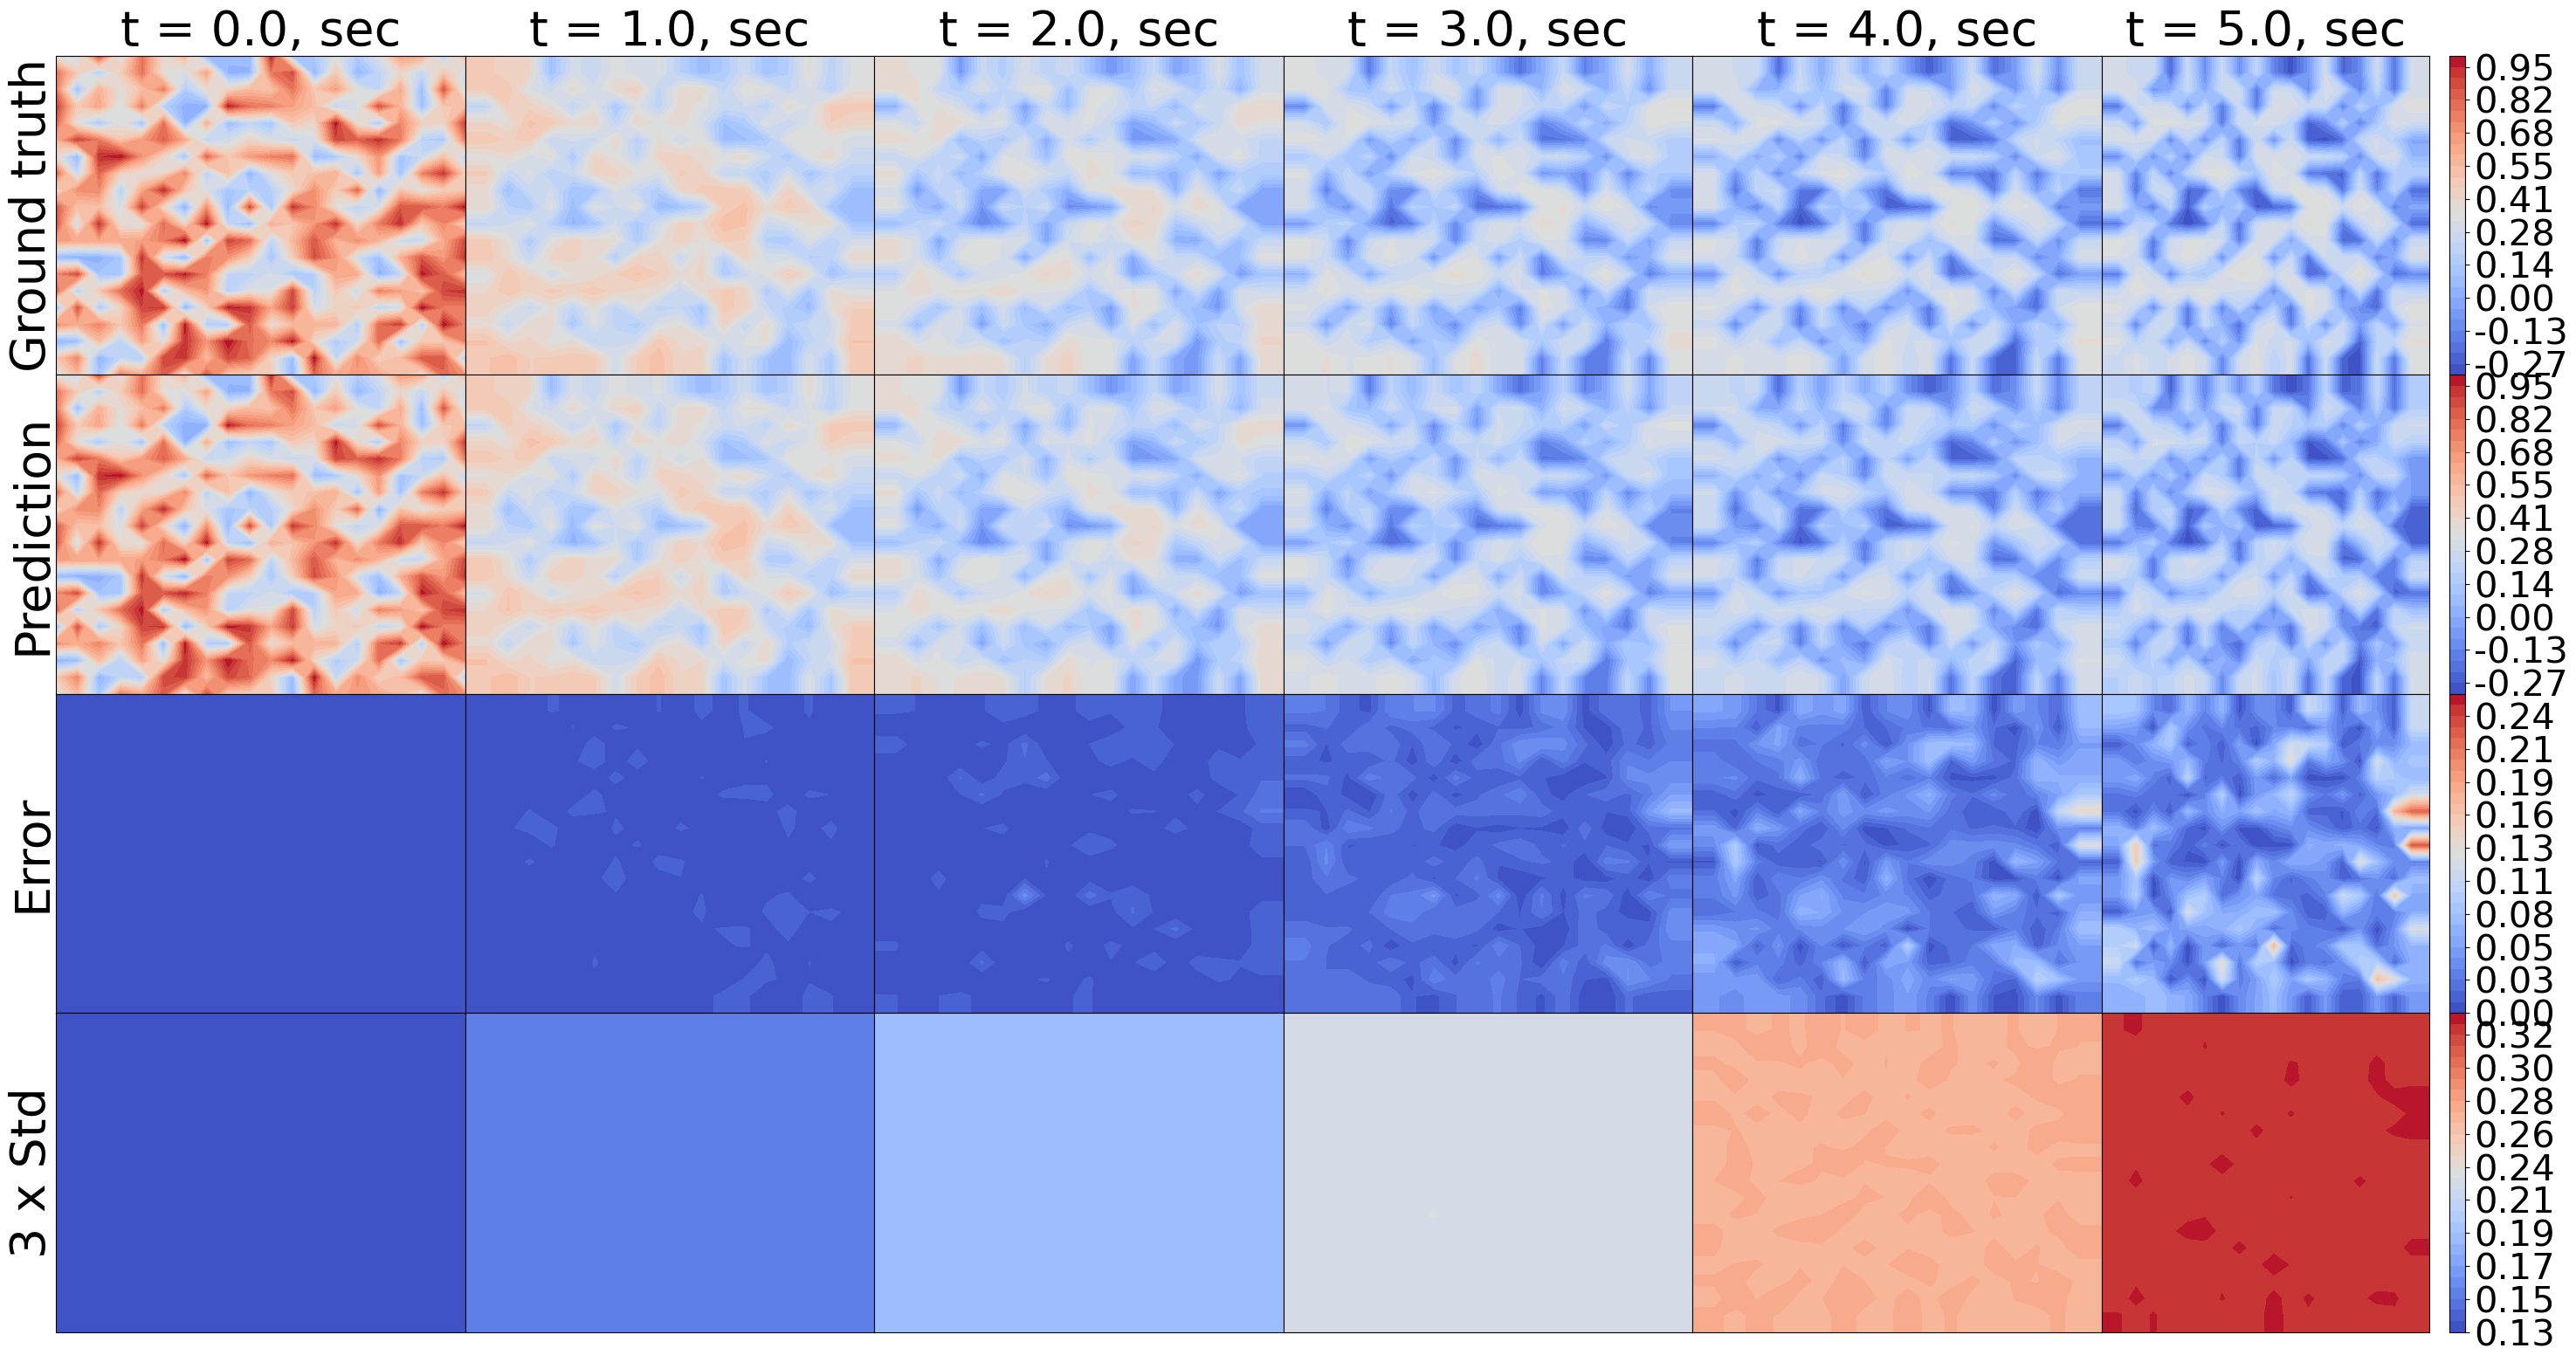

In [87]:
std_ord = 3

sample_times = [int(el) for el in jnp.linspace(0, len(t_arr), 6)]

X_mean, sX_tot, sX_ale, sX_eps = uncertainty(pred_rX)

Udmin, Udmax = jnp.min(data_test[:,0]), jnp.max(data_test[:,0])
Upmin, Upmax = jnp.min(X_mean[:,0]), jnp.max(X_mean[:,0])
Vdmin, Vdmax = jnp.min(data_test[:,1]), jnp.max(data_test[:,1])
Vpmin, Vpmax = jnp.min(X_mean[:,1]), jnp.max(X_mean[:,1])
sUpmin, sUpmax = jnp.min(sX_tot[:,0]), jnp.max(sX_tot[:,0])
sVpmin, sVpmax = jnp.min(sX_tot[:,1]), jnp.max(sX_tot[:,1])
Up, Vp = X_mean[:,0], X_mean[:,1]
Ud, Vd = data_test[:,0], data_test[:,1]
sU, sV = sX_tot[:,0], sX_tot[:,1]
saU, saV = sX_ale[:,0], sX_ale[:,1]
seU, seV = sX_eps[:,0], sX_eps[:,1]
dfUtest  = jnp.abs(Up-Ud)
dfUtrain = jnp.abs(Up[:len(data_train)]-data_train[:,0])
dfVtest  = jnp.abs(Vp-Vd)
dfVtrain = jnp.abs(Vp[:len(data_train)]-data_train[:,1])
dfUmin, dfUmax   = jnp.min(dfUtest), max(jnp.max(dfUtest), jnp.max(dfUtrain))
dfVmin, dfVmax   = jnp.min(dfVtest), max(jnp.max(dfVtest), jnp.max(dfVtrain))

plt.close('all')
fontsize = 20
plt.rcParams['font.size'] = fontsize
fig, ax = plt.subplots(4, len(sample_times), figsize=(len(sample_times)*5, 4*4), gridspec_kw = {'wspace':0, 'hspace':0})
for i,tidx in enumerate(sample_times):
    ax[0,i].set_title('t = '+str('{:2.1f}'.format(t_arr[tidx]))+', sec', size=fontsize*2)
    pcm0 = ax[0,i].contourf(Grid['grid_x'], Grid['grid_y'], Vd[tidx],  levels = jnp.linspace(Vdmin, Vdmax,30), cmap=cmap)
    # for c in pcm0.collections: c.set_rasterized(True)
    pcm1 = ax[1,i].contourf(Grid['grid_x'], Grid['grid_y'], Vp[tidx],  levels = jnp.linspace(Vdmin, Vdmax,30), cmap=cmap)#, extend='min')
    # for c in pcm1.collections: c.set_rasterized(True)
    pcm2 = ax[2,i].contourf(Grid['grid_x'], Grid['grid_y'], dfVtest[tidx],  levels = jnp.linspace(dfVmin, dfVmax,30), cmap=cmap)#, extend='max')
    # for c in pcm2.collections: c.set_rasterized(True)
    pcm3 = ax[3,i].contourf(Grid['grid_x'], Grid['grid_y'], std_ord*sV[tidx],  levels = std_ord*jnp.linspace(sVpmin, sVpmax,30), cmap=cmap)#, extend='max')
    # for c in pcm3.collections: c.set_rasterized(True)
    for j in range(4):
        ax[j,i].axes.xaxis.set_ticklabels([])
        ax[j,i].axes.yaxis.set_ticklabels([])
        ax[j,i].tick_params(left = False)
        ax[j,i].tick_params(bottom = False)
cbars = [pcm0, pcm1, pcm2, pcm3]
for k, pcm in enumerate(cbars):
    cbar = fig.colorbar(pcm, ax=ax[k, i], location='right')
    cbar.ax.tick_params(labelsize=1.5*fontsize)
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[0,0].text(-1, 0, 'Ground truth', horizontalalignment='right', verticalalignment='center', rotation='vertical', fontsize=fontsize*2)
ax[1,0].text(-1, 0, 'Prediction',   horizontalalignment='right', verticalalignment='center', rotation='vertical', fontsize=fontsize*2)
ax[2,0].text(-1, 0, 'Error',        horizontalalignment='right', verticalalignment='center', rotation='vertical', fontsize=fontsize*2)
ax[3,0].text(-1, 0, '3 x Std',      horizontalalignment='right', verticalalignment='center', rotation='vertical', fontsize=fontsize*2)
fig.tight_layout()
# plt.savefig(path+'/plots/pred_2DV.pdf', format='pdf', bbox_inches='tight', dpi=300)

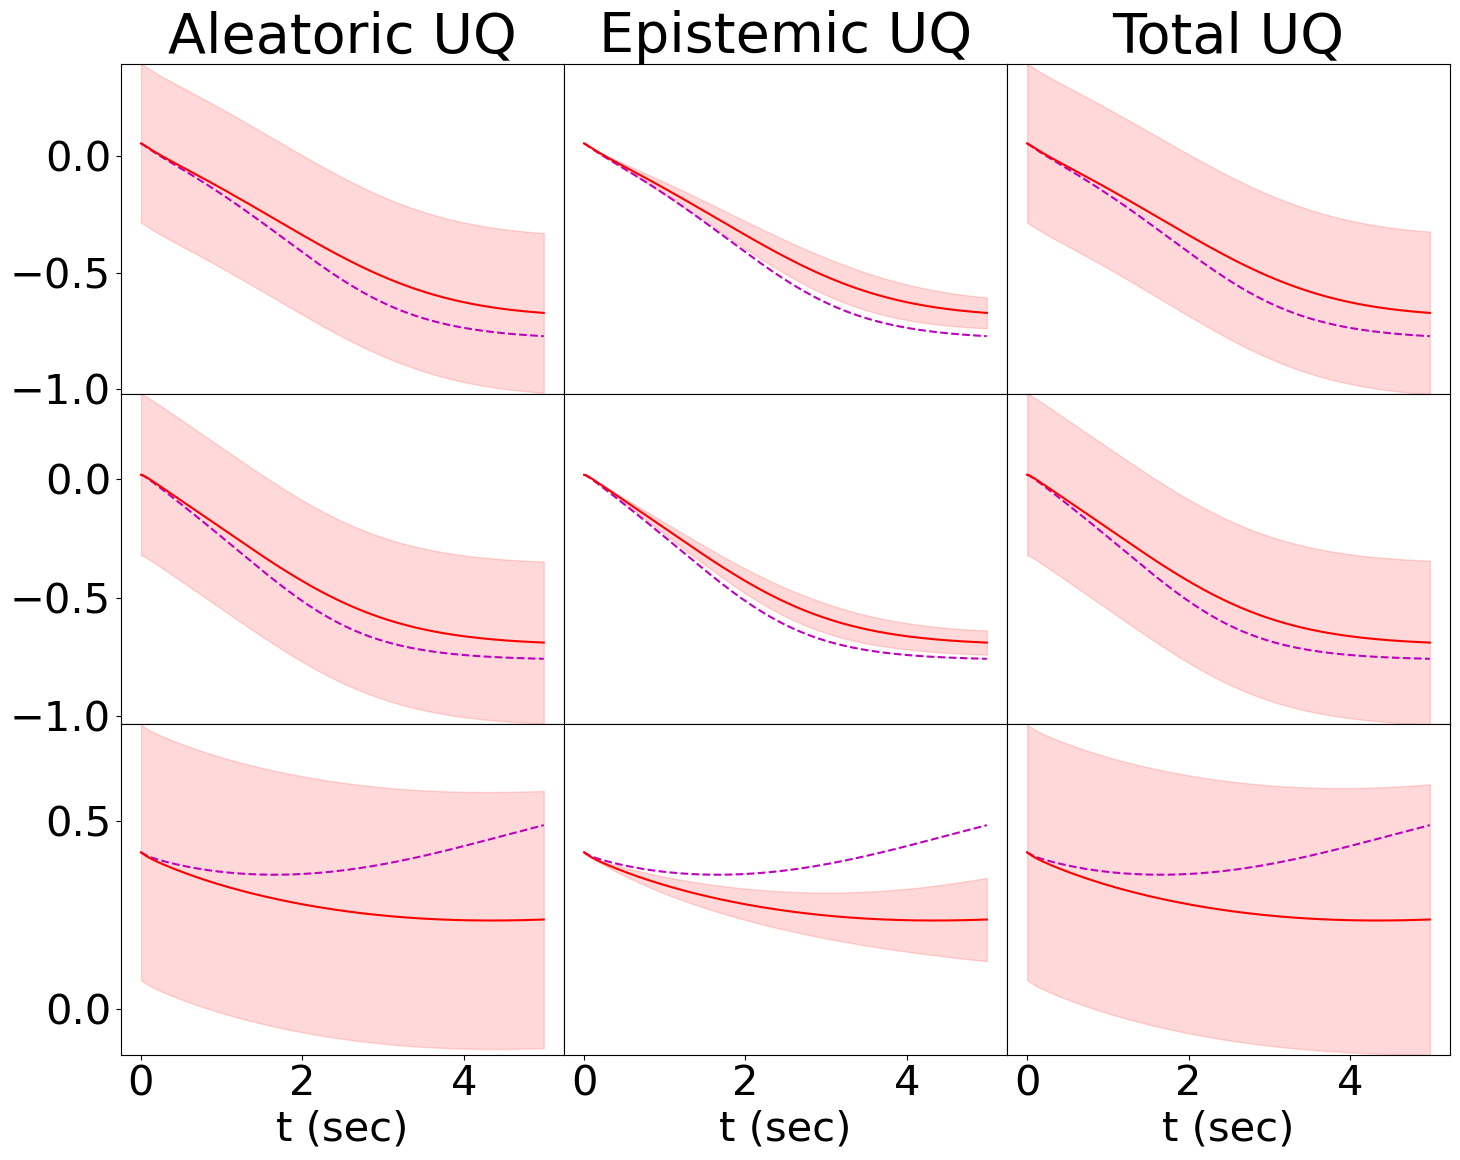

In [94]:
std_ord = 3
clr = 'r'
alpha = 0.15
idx_list = [[3,10],[10,10],[18,18]]

X_mean, sX_tot, sX_ale, sX_eps = uncertainty(pred_rX)
# HMC_X_mean, HMC_sX_tot, HMC_sX_ale, HMC_sX_eps = uncertainty(state['HMC_pred'])

plt.close('all')
fontsize = 20
fig, ax = plt.subplots(len(idx_list),3, figsize=(3*5, len(idx_list)*4), gridspec_kw = {'wspace':0, 'hspace':0})

var = 0
for n, idx in enumerate(idx_list):
    # ax[n,2].plot(t_arr[train_idx],data_train[:,var,*idx], '^m', markersize=3)
    for j in range(3):
        ax[n,j].plot(t_arr,data_test[:,var,*idx], '--m')
        ax[n,j].plot(t_arr,X_mean[:,var,*idx], clr)
        ax[n,j].set_ylim(jnp.min(X_mean[:,var,*idx]-std_ord*sX_tot[:,var,*idx]), jnp.max(X_mean[:,var,*idx]+std_ord*sX_tot[:,var,*idx]))
    ax[n,0].fill_between(t_arr, (X_mean[:,var,*idx]-std_ord*sX_ale[:,var,*idx]), (X_mean[:,var,*idx]+std_ord*sX_ale[:,var,*idx]), color=clr, alpha=alpha)
    ax[n,1].fill_between(t_arr, (X_mean[:,var,*idx]-std_ord*sX_eps[:,var,*idx]), (X_mean[:,var,*idx]+std_ord*sX_eps[:,var,*idx]), color=clr, alpha=alpha)
    ax[n,2].fill_between(t_arr, (X_mean[:,var,*idx]-std_ord*sX_tot[:,var,*idx]), (X_mean[:,var,*idx]+std_ord*sX_tot[:,var,*idx]), color=clr, alpha=alpha)
    # ax[n,0].fill_between(t_arr, (HMC_X_mean[:,var,*idx]-std_ord*HMC_sX_ale[:,var,*idx]), (HMC_X_mean[:,var,*idx]+std_ord*HMC_sX_ale[:,var,*idx]), color='b', alpha=alpha)
    # ax[n,1].fill_between(t_arr, (HMC_X_mean[:,var,*idx]-std_ord*HMC_sX_eps[:,var,*idx]), (HMC_X_mean[:,var,*idx]+std_ord*HMC_sX_eps[:,var,*idx]), color='b', alpha=alpha)
    # ax[n,2].fill_between(t_arr, (HMC_X_mean[:,var,*idx]-std_ord*HMC_sX_tot[:,var,*idx]), (HMC_X_mean[:,var,*idx]+std_ord*HMC_sX_tot[:,var,*idx]), color='b', alpha=alpha)

for j in range(3):
    ax[n,j].set_xlabel('t (sec)', fontsize=1.5*fontsize)
    # ax[0,j].axes.xaxis.set_ticklabels([])
for j in range(3):
    ax[j,1].axes.yaxis.set_ticklabels([])
    ax[j,2].axes.yaxis.set_ticklabels([])
    ax[j,1].tick_params(left = False)
    ax[j,2].tick_params(left = False)
    # ax[j,0].set_ylabel('v'+str(var))

for i in range(3):
    for j in range(3):
        ax[i, j].tick_params(
            axis='both',
            which='both',
            labelsize=1.5*fontsize  # Increase tick number size
        )

ax[0,0].set_title('Aleatoric UQ', size=fontsize*2)
ax[0,1].set_title('Epistemic UQ', size=fontsize*2)
ax[0,2].set_title('Total UQ', size=fontsize*2)
fig.tight_layout()
# plt.savefig(path+'/plots/pred_1DU'+case+ext_name, dpi=300)

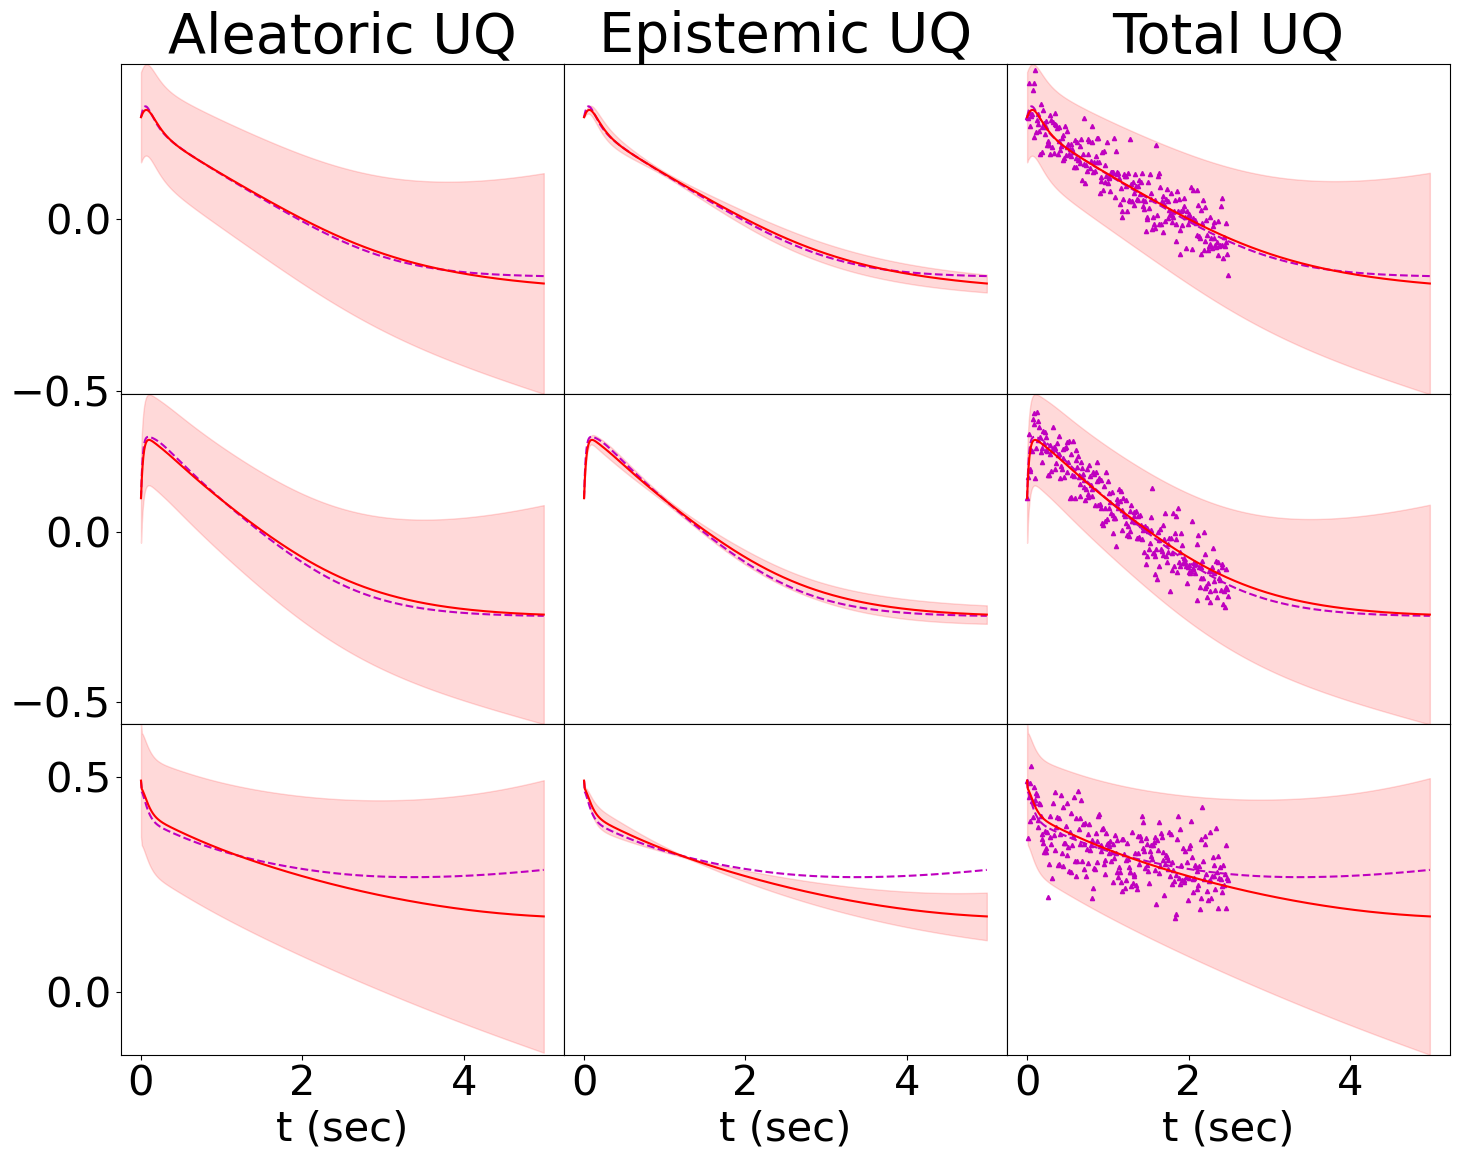

In [95]:
std_ord = 3
clr = 'r'
alpha = 0.15
idx_list = [[3,10],[10,10],[18,18]]

X_mean, sX_tot, sX_ale, sX_eps = uncertainty(pred_rX)

plt.close('all')
fig, ax = plt.subplots(len(idx_list),3, figsize=(3*5, len(idx_list)*4), gridspec_kw = {'wspace':0, 'hspace':0})

var = 1
for n, idx in enumerate(idx_list):
    ax[n,2].plot(t_arr[train_idx],data_train[:,var,*idx], '^m', markersize=3)
    for j in range(3):
        ax[n,j].plot(t_arr,data_test[:,var,*idx], '--m')
        ax[n,j].plot(t_arr,X_mean[:,var,*idx], clr)
        ax[n,j].set_ylim(jnp.min(X_mean[:,var,*idx]-std_ord*sX_tot[:,var,*idx]), jnp.max(X_mean[:,var,*idx]+std_ord*sX_tot[:,var,*idx]))
        # ax[n,j].set_ylim(-1,1)
    ax[n,0].fill_between(t_arr, (X_mean[:,var,*idx]-std_ord*sX_ale[:,var,*idx]), (X_mean[:,var,*idx]+std_ord*sX_ale[:,var,*idx]), color=clr, alpha=alpha)
    ax[n,1].fill_between(t_arr, (X_mean[:,var,*idx]-std_ord*sX_eps[:,var,*idx]), (X_mean[:,var,*idx]+std_ord*sX_eps[:,var,*idx]), color=clr, alpha=alpha)
    ax[n,2].fill_between(t_arr, (X_mean[:,var,*idx]-std_ord*sX_tot[:,var,*idx]), (X_mean[:,var,*idx]+std_ord*sX_tot[:,var,*idx]), color=clr, alpha=alpha)
    

for j in range(3):
    ax[n,j].set_xlabel('t (sec)', fontsize=1.5*fontsize)
    # ax[0,j].axes.xaxis.set_ticklabels([])
for j in range(3):
    ax[j,1].axes.yaxis.set_ticklabels([])
    ax[j,2].axes.yaxis.set_ticklabels([])
    ax[j,1].tick_params(left = False)
    ax[j,2].tick_params(left = False)
    # ax[j,0].set_ylabel('v'+str(var))

for i in range(3):
    for j in range(3):
        ax[i, j].tick_params(
            axis='both',
            which='both',
            labelsize=1.5*fontsize  # Increase tick number size
        )
        # ax[i, j].set_ylim(-1, 1)
ax[0,0].set_title('Aleatoric UQ', size=fontsize*2)
ax[0,1].set_title('Epistemic UQ', size=fontsize*2)
ax[0,2].set_title('Total UQ', size=fontsize*2)

fig.tight_layout()
# plt.savefig(path+'/plots/pred_1DV'+case+ext_name, dpi=300)

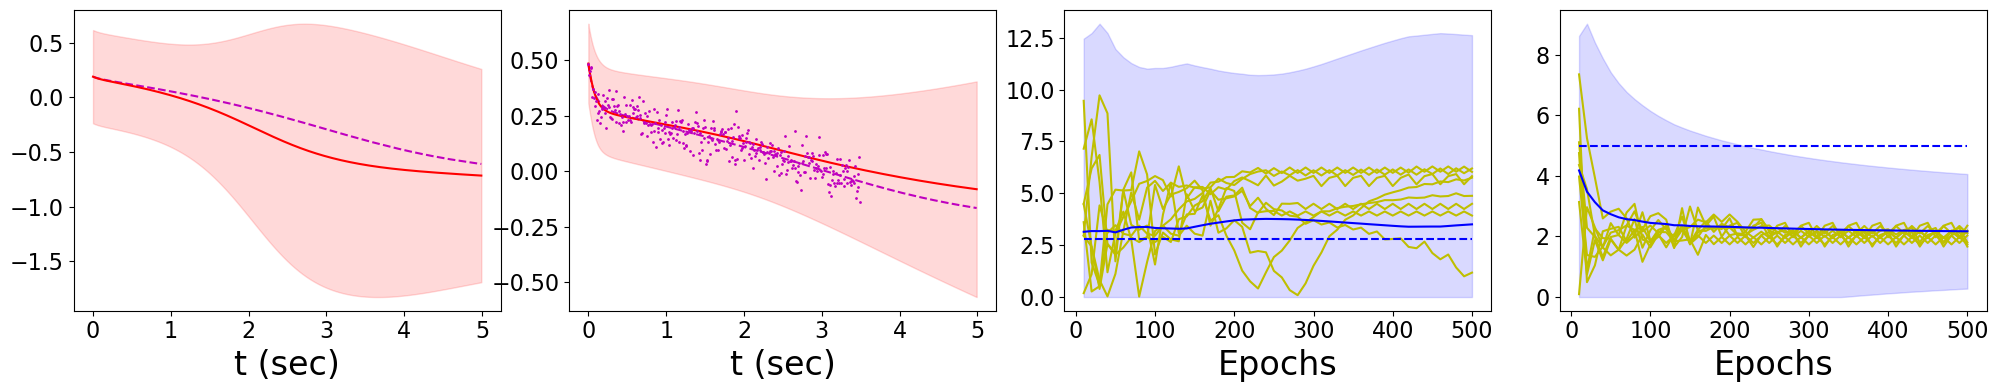

In [ ]:
std_ord = 3
clr = 'r'
alpha = 0.15
idx_list = [[12,15 ]]
X_mean, sX_tot, sX_ale, sX_eps = uncertainty(pred_rX)
plt.close('all')
fontsize = 16
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(1,4, figsize=(4*5, 1*4))
j=0
for n, idx in enumerate(idx_list):
    for i in range(2):
        ax[j].plot(t_arr,data_test[:,i,*idx], '--m')
        ax[j].plot(t_arr,X_mean[:,i,*idx], clr)
        ax[j].fill_between(t_arr, (X_mean[:,i,*idx]-std_ord*sX_tot[:,i,*idx]), (X_mean[:,i,*idx]+std_ord*sX_tot[:,i,*idx]), color=clr, alpha=alpha)
        ax[j].set_xlabel('t (sec)', fontsize=1.5*fontsize)
        # ax[i].set_ylabel('v'+str(i))
        # ax[i].set_title('v'+str(i+1), fontsize=16)
        j += 1
    ax[0].plot(t_arr[train_idx],data_train[:,0,*idx], 'om', markersize=1)
    ax[1].plot(t_arr[train_idx],data_train[:,1,*idx], 'om', markersize=1)

for i in [0,1]:
    for m in range(PhyDEStore[1].shape[1]):
        ax[i+2].plot(Epoch, PhyDEStore[i+1][:,m], 'y')
    ax[i+2].plot(Epoch, D_swag[i][0], 'b')
    ax[i+2].plot(Epoch, jnp.ones_like(Epoch)*D_true[i], '--b')
    ax[i+2].fill_between(Epoch, np.clip(D_swag[i][0]-std*D_swag[i][1], 0, 100), (D_swag[i][0]+std*D_swag[i][1]), color='b', alpha=0.15)
    ax[i+2].set_xlabel('Epochs', fontsize=1.5*fontsize)
    # ax[i+2].set_ylabel('D'+str(i+1), fontsize=1.5*fontsize)
fig.tight_layout()

for i in range(4):
    ax[i].tick_params(
        axis='both',
        which='both',
        labelsize=1.*fontsize  # Increase tick number size
    )

# plt.savefig(path+'/plots/pred_1DUVC'+case+ext_name, dpi=300)

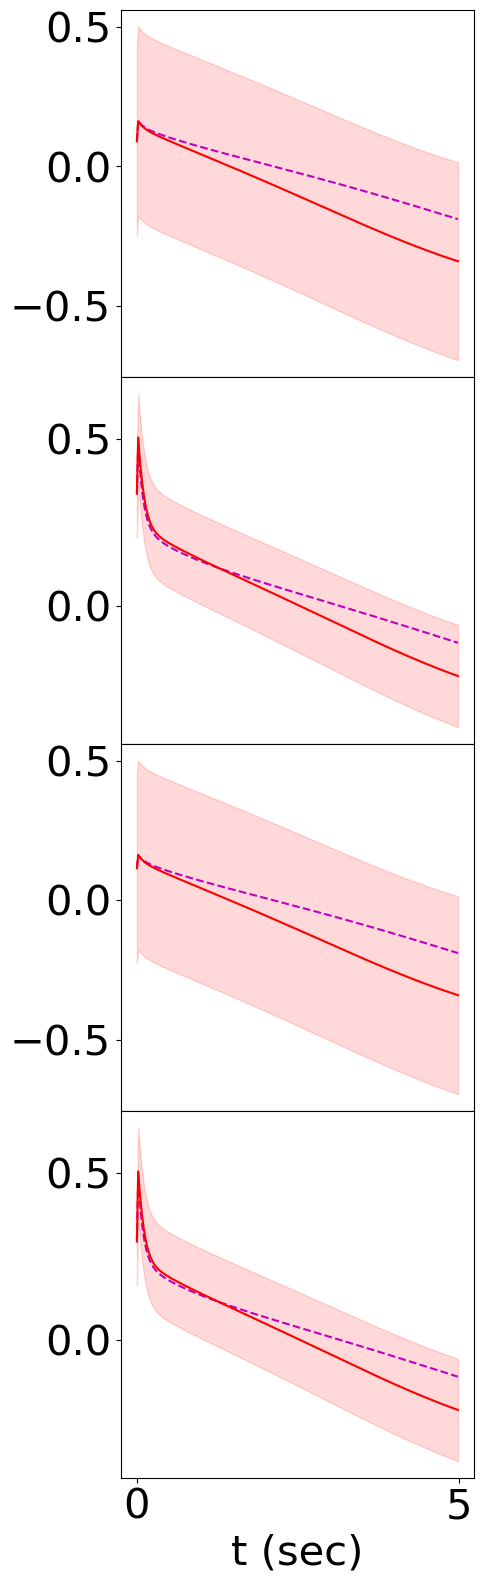

In [150]:
std_ord = 3
clr = 'r'
alpha = 0.15
idx_list = [[8,16],[15,10]]
X_mean, sX_tot, sX_ale, sX_eps = uncertainty(pred_rX)
plt.close('all')
fontsize = 20
plt.rcParams['font.size'] = 12
## horizantial plot
# fig, ax = plt.subplots(1,2*len(idx_list), figsize=(2*len(idx_list)*5, 1*4))
## vertical plot
fig, ax = plt.subplots(2*len(idx_list),1, figsize=(1*5, 2*len(idx_list)*4), gridspec_kw = {'hspace':0})
j=0
for n, idx in enumerate(idx_list):
    for i in range(2):
        # ax[j].plot(t_arr[train_idx],data_train[:,i,*idx], 'om', markersize=1)
        ax[j].plot(t_arr,data_test[:,i,*idx], '--m')
        ax[j].plot(t_arr,X_mean[:,i,*idx], clr)
        ax[j].fill_between(t_arr, (X_mean[:,i,*idx]-std_ord*sX_tot[:,i,*idx]), (X_mean[:,i,*idx]+std_ord*sX_tot[:,i,*idx]), color=clr, alpha=alpha)
        ax[j].set_xlabel('t (sec)', fontsize=1.5*fontsize)
        # ax[i].set_ylabel('v'+str(i))
        # ax[i].set_title('v'+str(i+1), fontsize=16)
        j += 1

for i in range(4):
    ax[i].tick_params(
        axis='both',
        which='both',
        labelsize=1.5*fontsize  # Increase tick number size
    )

fig.tight_layout()
# plt.savefig(path+'/plots/pred_1DUV'+case+ext_name, dpi=300)

In [15]:
path+'/plots/pred_1DUV'+case+ext_name

'/home/deepak/Project/UnscentedTransform_UQpropagation/output/PDE/RD_C0_D[1]_ND_rnd_20x20_1e2t1e2/plots/pred_1DUV_ND_rnd_10x10_1e2t1e2_test'

In [ ]:
HOME = os.getcwd()
case = '_rd_gp'
ext_name='_train'

train_var=[1]

prob_name = 'RD'  ## option: RD
case_no   =  0


dir = prob_name+'_C'+str(case_no)+'_D'+str(train_var)+'_UQ_test'
print('case = '+dir)
path = os.path.join(HOME, "output/PDE/"+dir)

PostPross_Data_1t = PyTree.load(path+'/checkpoints', name='PostPross_Data2_30x_0.001t')
PostPross_Data_2t = PyTree.load(path+'/checkpoints', name='PostPross_Data2_30x_0.002t')
PostPross_Data_5t = PyTree.load(path+'/checkpoints', name='PostPross_Data2_30x_0.005t')
state_1t = PyTree.load(path+'/checkpoints', name='state2_30x_0.001t')
state_2t = PyTree.load(path+'/checkpoints', name='state2_30x_0.002t')
state_5t = PyTree.load(path+'/checkpoints', name='state2_30x_0.005t')
data_1t = PostPross_Data_1t['cdata']
data_2t = PostPross_Data_2t['cdata']
data_5t = PostPross_Data_5t['cdata']

case = RD_C0_D[1]_UQ_test
loading PostPross_Data2_30x_0.001t parameters
Found PostPross_Data2_30x_0.001t parameters
loading PostPross_Data2_30x_0.002t parameters
Found PostPross_Data2_30x_0.002t parameters
loading PostPross_Data2_30x_0.005t parameters
Found PostPross_Data2_30x_0.005t parameters
loading state2_30x_0.001t parameters
Found state2_30x_0.001t parameters
loading state2_30x_0.002t parameters
Found state2_30x_0.002t parameters
loading state2_30x_0.005t parameters
Found state2_30x_0.005t parameters


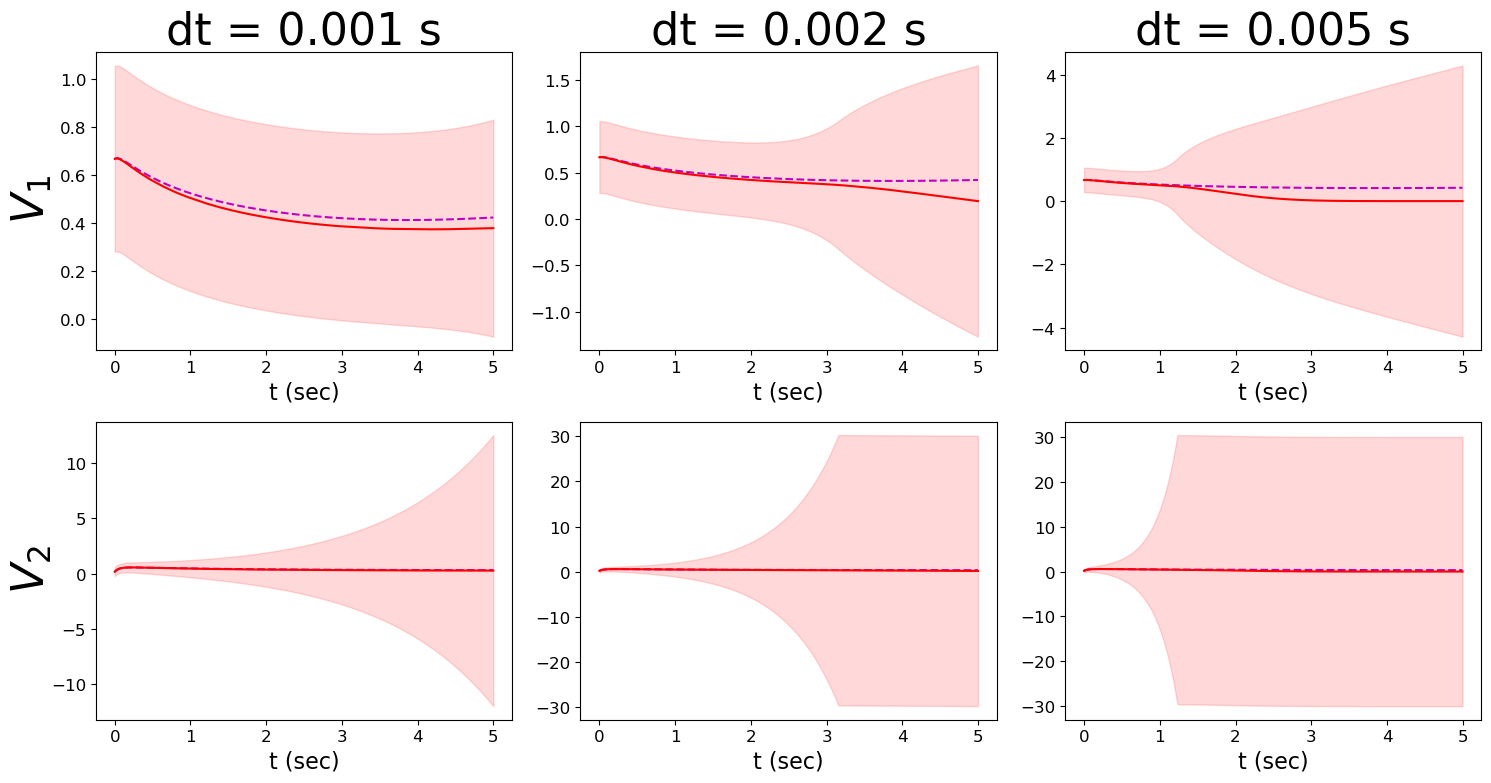

In [ ]:
std_ord = 3
clr = 'r'
alpha = 0.15
idx = [3,10]

t_arr = data_1t['t_arr'], data_2t['t_arr'], data_5t['t_arr']
data_train = data_1t['data_train'], data_2t['data_train'], data_5t['data_train']
data_test = data_1t['data_test'], data_2t['data_test'], data_5t['data_test']
train_idx = data_1t['train_idx'], data_2t['train_idx'], data_5t['train_idx']
pred_rX = PostPross_Data_1t['pred_rX'], PostPross_Data_2t['pred_rX'], PostPross_Data_5t['pred_rX']

plt.close('all')
fontsize = 16
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(2,3, figsize=(3*5, 2*4))

for j in range(3):

    X_mean, sX_tot, sX_ale, sX_eps = uncertainty(pred_rX[j])
    for i in range(2):
        # ax[i,j].plot(t_arr[j][train_idx[j]],data_train[j][:,i,*idx], 'om', markersize=1)
        ax[i,j].plot(t_arr[j],data_test[j][:,i,*idx], '--m')
        ax[i,j].plot(t_arr[j],X_mean[:,i,*idx], clr)
        ax[i,j].fill_between(t_arr[j], (X_mean[:,i,*idx]-std_ord*sX_tot[:,i,*idx]), (X_mean[:,i,*idx]+std_ord*sX_tot[:,i,*idx]), color=clr, alpha=alpha)
        ax[i,j].set_xlabel('t (sec)', fontsize=16)
        # ax[i].set_ylabel('v'+str(i))
        # ax[i].set_title('v'+str(i+1), fontsize=16)

ax[0,0].set_title('dt = 0.001 s', size=fontsize*2)
ax[0,1].set_title('dt = 0.002 s', size=fontsize*2)
ax[0,2].set_title('dt = 0.005 s', size=fontsize*2)

ax[0,0].text(-0.8, 0.5, r'$V_1$', horizontalalignment='right', verticalalignment='center', rotation='vertical', fontsize=fontsize*2)
ax[1,0].text(-0.8, 0.5, r'$V_2$', horizontalalignment='right', verticalalignment='center', rotation='vertical', fontsize=fontsize*2)

fig.tight_layout()
plt.savefig(path+'/plots/pred_UQdt'+case+ext_name, dpi=300)

In [ ]:
PostPross_Data_1x = PyTree.load(path+'/checkpoints', name='PostPross_Data2_10x_0.001t')
PostPross_Data_2x = PyTree.load(path+'/checkpoints', name='PostPross_Data2_20x_0.001t')
PostPross_Data_3x = PyTree.load(path+'/checkpoints', name='PostPross_Data2_30x_0.001t')
PostPross_Data_4x = PyTree.load(path+'/checkpoints', name='PostPross_Data2_40x_0.001t')
state_1x = PyTree.load(path+'/checkpoints', name='state2_10x_0.001t')
state_2x = PyTree.load(path+'/checkpoints', name='state2_20x_0.001t')
state_3x = PyTree.load(path+'/checkpoints', name='state2_30x_0.001t')
state_4x = PyTree.load(path+'/checkpoints', name='state2_40x_0.001t')
data_1x = PostPross_Data_1x['cdata']
data_2x = PostPross_Data_2x['cdata']
data_3x = PostPross_Data_3x['cdata']
data_4x = PostPross_Data_4x['cdata']

loading PostPross_Data2_10x_0.001t parameters
Found PostPross_Data2_10x_0.001t parameters
loading PostPross_Data2_20x_0.001t parameters
Found PostPross_Data2_20x_0.001t parameters
loading PostPross_Data2_30x_0.001t parameters
Found PostPross_Data2_30x_0.001t parameters
loading PostPross_Data2_40x_0.001t parameters
Found PostPross_Data2_40x_0.001t parameters
loading state2_10x_0.001t parameters
Found state2_10x_0.001t parameters
loading state2_20x_0.001t parameters
Found state2_20x_0.001t parameters
loading state2_30x_0.001t parameters
Found state2_30x_0.001t parameters
loading state2_40x_0.001t parameters
Found state2_40x_0.001t parameters


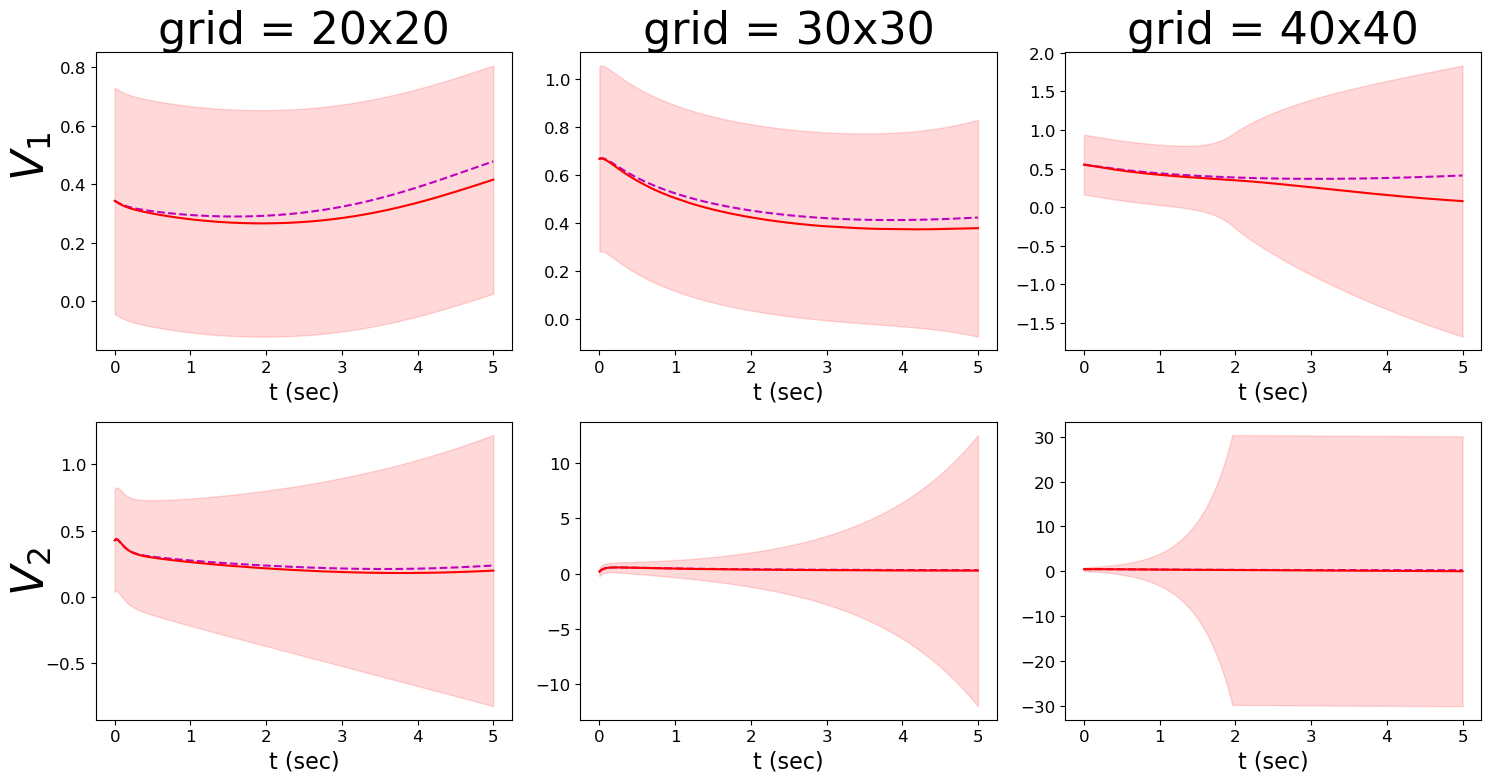

In [ ]:
std_ord = 3
clr = 'r'
alpha = 0.15
idx = [3,10]

t_arr = data_2x['t_arr'], data_3x['t_arr'], data_4x['t_arr']
data_train = data_2x['data_train'], data_3x['data_train'], data_4x['data_train']
data_test = data_2x['data_test'], data_3x['data_test'], data_4x['data_test']
train_idx = data_2x['train_idx'], data_3x['train_idx'], data_4x['train_idx']
pred_rX = PostPross_Data_2x['pred_rX'], PostPross_Data_3x['pred_rX'], PostPross_Data_4x['pred_rX']

plt.close('all')
fontsize = 16
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(2,3, figsize=(3*5, 2*4))

for j in range(3):

    X_mean, sX_tot, sX_ale, sX_eps = uncertainty(pred_rX[j])
    for i in range(2):
        # ax[i,j].plot(t_arr[j][train_idx[j]],data_train[j][:,i,*idx], 'om', markersize=1)
        ax[i,j].plot(t_arr[j],data_test[j][:,i,*idx], '--m')
        ax[i,j].plot(t_arr[j],X_mean[:,i,*idx], clr)
        ax[i,j].fill_between(t_arr[j], (X_mean[:,i,*idx]-std_ord*sX_tot[:,i,*idx]), (X_mean[:,i,*idx]+std_ord*sX_tot[:,i,*idx]), color=clr, alpha=alpha)
        ax[i,j].set_xlabel('t (sec)', fontsize=16)
        # ax[i].set_ylabel('v'+str(i))
        # ax[i].set_title('v'+str(i+1), fontsize=16)

ax[0,0].set_title('grid = 20x20', size=fontsize*2)
ax[0,1].set_title('grid = 30x30', size=fontsize*2)
ax[0,2].set_title('grid = 40x40', size=fontsize*2)

ax[0,0].text(-0.8, 0.5, r'$V_1$', horizontalalignment='right', verticalalignment='center', rotation='vertical', fontsize=fontsize*2)
ax[1,0].text(-0.8, 0.2, r'$V_2$', horizontalalignment='right', verticalalignment='center', rotation='vertical', fontsize=fontsize*2)

fig.tight_layout()
plt.savefig(path+'/plots/pred_UQdx'+case+ext_name, dpi=300)